In [1]:
import openai
import pennylane as qml
from PIL import Image
import numpy as np

In [2]:
from key import api_key

In [3]:
from openai import OpenAI

client = OpenAI(api_key=api_key)

def prob_image_arr(arr, openai_api_key):
    # Use OpenAI API to interpret the text
    openai.api_key = openai_api_key

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array. It should output '1' if the '1's in the array form a perfect rectangle, without any breaks or irregularities. If the '1's do not form a perfect rectangle, the model should output '0'. This binary output should be based solely on the geometric arrangement of '1's within the array."
            #   },
            {
             "role": "system",
               "content": "The model is tasked to receive a 2D binary array consisting of 0s and 1s, with the 1s forming a specific shape. It should analyze this shape and calculate a score from 0 to 1 that indicates how closely this shape resembles a rectangle. A score of 1 denotes an exact rectangle, while a score of 0 indicates no resemblance to a rectangle. The model should focus on the spatial arrangement and continuity of the 1s to determine this score. The output should only be the score with a single number as output without any extra text as explanation."

            # "content": "The model's task is to analyze a 2D binary array and provide a numerical score between 0 and 1. This score represents how closely the '1's in the array resemble a rectangle, with 1 being a perfect rectangle and 0 indicating no resemblance. The model should output only the score, without any accompanying explanation."
            },
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array and providing a score between 0 and 1. This score should reflect how closely the arrangement of '1's within the array resembles a rectangle. A score of 1 indicates a perfect rectangle, while a score closer to 0 suggests less resemblance to a rectangle. The model should consider factors such as the continuity, alignment, and proportion of '1's in determining this score."
            #   },
              {"role": "user", "content": f"{arr}"}
            ]
        )
        # print(response)
        content = content = response.choices[0].message.content
        return content
    except Exception as e:
        return f"Error in OpenAI API call: {e}"


In [4]:
# is_arr = prob_image_arr(input_arr, api_key)
# print(is_arr)

In [5]:
import pennylane as qml
from scipy.optimize import minimize
# from pennylane import numpy as np




In [6]:
n_qubits = 8
dev = qml.device('default.qubit', wires=n_qubits)

In [7]:
def find_n_largest_numbers(arr, n):
    # Find the indices of the n largest elements
    indices = np.argsort(arr)[-n:]
    # Find the n largest elements
    largest_elements = arr[indices]
    return largest_elements, indices

def indices_to_binary(indices):
    # Convert each index to binary and ensure it's 8 bits
    return [format(index, f'0{n_qubits}b') for index in indices]

def int_to_binary(n, digits):
    binary_str = format(n, 'b')
    # Pad the binary string with leading zeros to ensure it has 'digits' length
    return binary_str.zfill(digits)

In [8]:
# Define the quantum circuit
@qml.qnode(dev)
def circuit(param,index):
    index = int_to_binary(index,n_qubits)
    for i, char in enumerate(index):
        if(char=='1'):
            qml.PauliX(wires=i)
        # qml.Hadamard(wires=i)
            
    qml.StronglyEntanglingLayers(weights=param, wires=range(n_qubits))
    # qml.BasicEntanglerLayers(weights=param, wires=range(n_qubits))
    # return qml.probs(wires=range(n_qubits))
    out = [qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)),qml.expval(qml.PauliZ(2)),qml.expval(qml.PauliZ(3)),qml.expval(qml.PauliZ(4)),qml.expval(qml.PauliZ(5)),qml.expval(qml.PauliZ(6)),qml.expval(qml.PauliZ(7))]
    # out = np.array(out)
    return out


In [9]:
def convert_to_int(nested_list):
    return [[int(element) for element in sublist] for sublist in nested_list]

def binary_array_to_png_and_display(binary_array, scale_factor=10):
    # binary_array = convert_to_int(binary_array)
    # Convert the binary array to a numpy array with values 0 and 255
    image_array = np.array(binary_array) * 255

    # Create an image object from the numpy array
    image = Image.fromarray(np.uint8(image_array), 'L')

    # Scale the image
    original_size = image.size
    scaled_size = tuple([dimension * scale_factor for dimension in original_size])
    scaled_image = image.resize(scaled_size, Image.NEAREST)
    display(scaled_image)


In [10]:
def feature_map(input_arr):
    """Flatten the 2D binary array into a 1D feature map."""
    return [item for sublist in input_arr for item in sublist]

def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    vec1, vec2 = np.array(vec1), np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    if(norm_vec2*norm_vec1==0): return 0
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

In [11]:
a = int_to_binary(4,5)
for i, char in enumerate(a):
    if(char=='1'):
        print(True)

True


In [12]:
# smiley_pattern = np.array([
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 1, 0, 0, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 1, 0, 0, 0, 0, 1, 0],
#         [0, 0, 1, 1, 1, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0]
#     ])

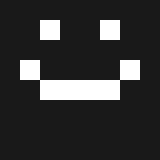

In [13]:

smiley_pattern = np.array([
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1,0.1,0.1, 1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1, 1,0.1,0.1,0.1,0.1, 1,0.1],
        [0.1,0.1, 1, 1, 1, 1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
    ])
binary_array_to_png_and_display(smiley_pattern,scale_factor=20)

smiley_pattern_vec = feature_map(smiley_pattern)

0: ────╭StronglyEntanglingLayers(M0)─┤  <Z>
1: ────├StronglyEntanglingLayers(M0)─┤  <Z>
2: ────├StronglyEntanglingLayers(M0)─┤  <Z>
3: ────├StronglyEntanglingLayers(M0)─┤  <Z>
4: ────├StronglyEntanglingLayers(M0)─┤  <Z>
5: ────├StronglyEntanglingLayers(M0)─┤  <Z>
6: ────├StronglyEntanglingLayers(M0)─┤  <Z>
7: ──X─╰StronglyEntanglingLayers(M0)─┤  <Z>
M0 = 
[[[0.9345568  0.68654613 0.80017851]
  [0.89226649 0.74858304 0.97940899]
  [0.62258896 0.23756096 0.42382557]
  [0.98165801 0.98508779 0.17348069]
  [0.9774697  0.22531184 0.04316717]
  [0.4603637  0.04660801 0.92186338]
  [0.58014643 0.50089584 0.29551944]
  [0.06997408 0.29533833 0.60044207]]

 [[0.10762894 0.5408665  0.71802209]
  [0.77899642 0.85833067 0.79697259]
  [0.33504319 0.62894975 0.36154866]
  [0.7637927  0.40578584 0.50848857]
  [0.4732717  0.64648814 0.75180096]
  [0.06122304 0.49035371 0.77804   ]
  [0.73202089 0.62229797 0.91432066]
  [0.23654275 0.87268736 0.08811558]]]


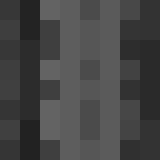

Current loss: 0.41809380740921


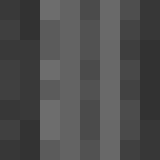

Current loss: 0.3983449104220972


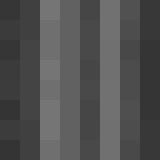

Current loss: 0.38856445715989707


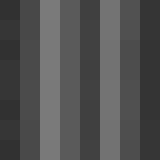

Current loss: 0.3847692032769583


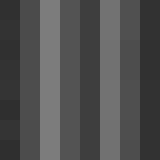

Current loss: 0.38365735449419014


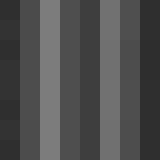

Current loss: 0.3830328404468152


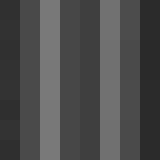

Current loss: 0.3823159853282584


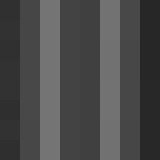

Current loss: 0.38191564984351345


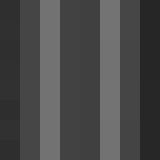

Current loss: 0.38173738520529554


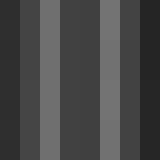

Current loss: 0.3814238970127912


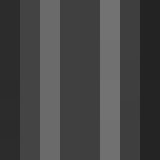

Current loss: 0.38086092481527


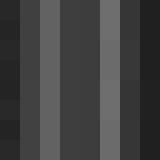

Current loss: 0.3799100900044605


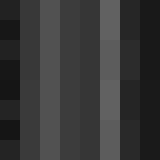

Current loss: 0.3789722683425666


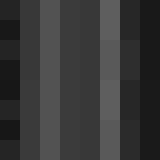

Current loss: 0.37762261854102197


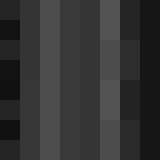

Current loss: 0.37523710017344347


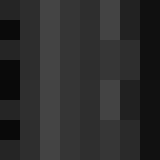

Current loss: 0.37180190659406553


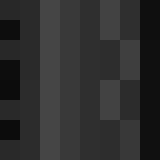

Current loss: 0.3694724870112711


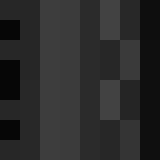

Current loss: 0.3678768165553543


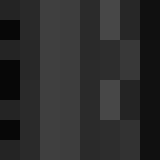

Current loss: 0.3654543138915862


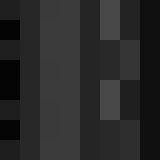

Current loss: 0.3610204311765325


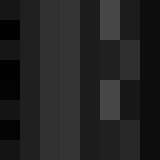

Current loss: 0.3530792342766298


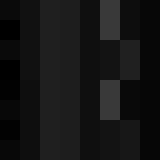

Current loss: 0.3424617823898124


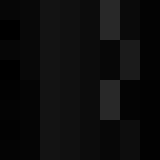

Current loss: 0.33413684077961814


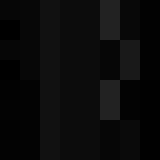

Current loss: 0.33075562757043286


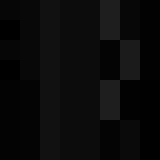

Current loss: 0.3260362230174193


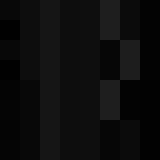

Current loss: 0.3209635176318276


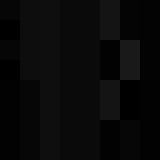

Current loss: 0.3170933704379415


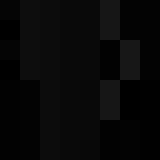

Current loss: 0.3134931560881976


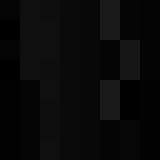

Current loss: 0.3124527122334557


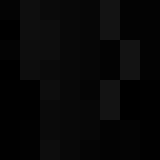

Current loss: 0.3077374945369954


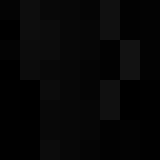

Current loss: 0.3063742234509407


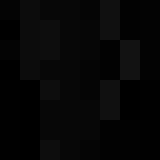

Current loss: 0.3043172230810224


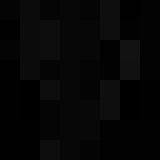

Current loss: 0.30213652275501257


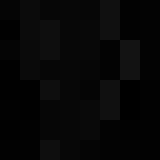

Current loss: 0.29918366761369597


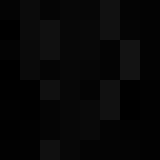

Current loss: 0.29705098408604735


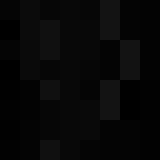

Current loss: 0.29564415212380724


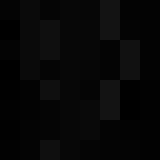

Current loss: 0.29457050140809504


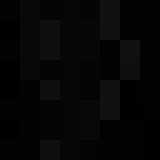

Current loss: 0.2931719672125025


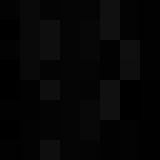

Current loss: 0.2923300156181874


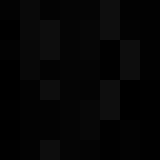

Current loss: 0.29126027974586843


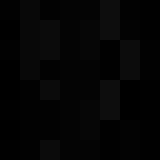

Current loss: 0.2897179846906708


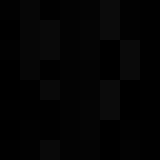

Current loss: 0.28755982009518355


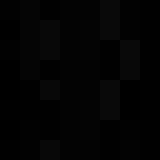

Current loss: 0.2846354440944079


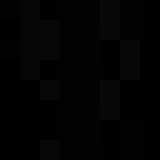

Current loss: 0.28301586887765307


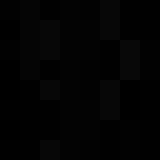

Current loss: 0.2821778212764522


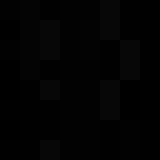

Current loss: 0.28108373613639215


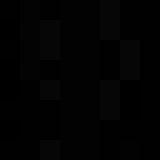

Current loss: 0.2804520940417884


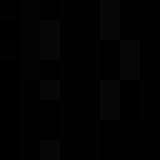

Current loss: 0.2801003608439889


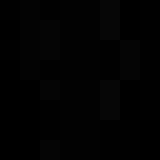

Current loss: 0.27975550101316593


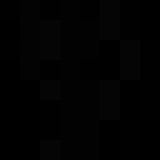

Current loss: 0.2794003815727637


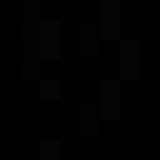

Current loss: 0.2791262492845963


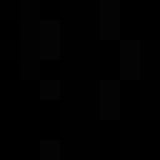

Current loss: 0.27875911551572297


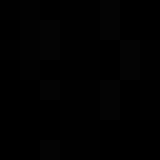

Current loss: 0.27861854673796727


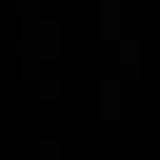

Current loss: 0.278384451651553


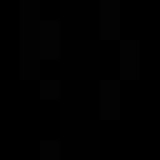

Current loss: 0.2781154636407043


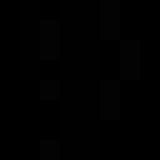

Current loss: 0.2780326755753919


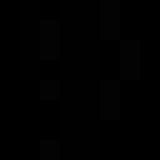

Current loss: 0.2779517284224369


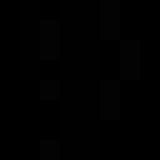

Current loss: 0.277834658714998


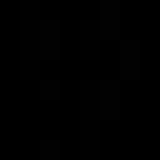

Current loss: 0.2777604510867199


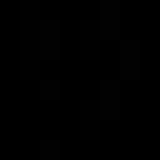

Current loss: 0.2776624408015419


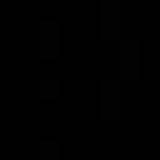

Current loss: 0.277575033675198


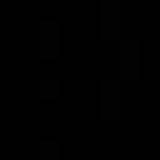

Current loss: 0.2775290666714373


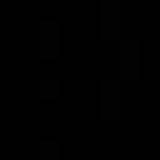

Current loss: 0.2774391271897684


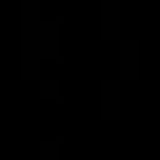

Current loss: 0.277371118099475


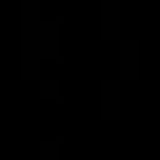

Current loss: 0.277329383812006


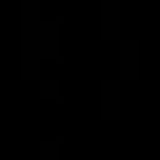

Current loss: 0.2773010761669722


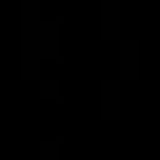

Current loss: 0.27727345105229906


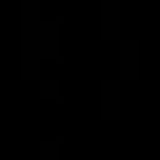

Current loss: 0.2772674554838347


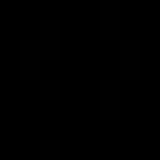

Current loss: 0.27721852147281123


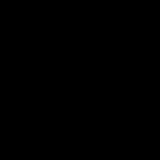

Current loss: 0.2771341077233106


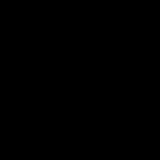

Current loss: 0.27698572900858875


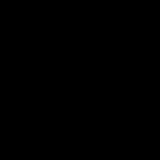

Current loss: 0.27673770746708215


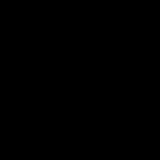

Current loss: 0.27666724491077954


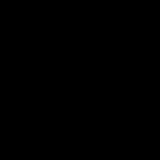

Current loss: 0.276545187796877


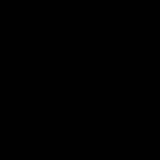

Current loss: 0.27637141936191


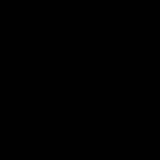

Current loss: 0.2762381899993972


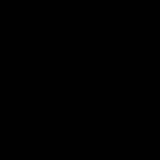

Current loss: 0.2760938549330594


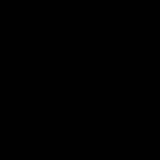

Current loss: 0.2760572811461899


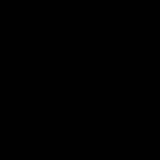

Current loss: 0.27599142120767006


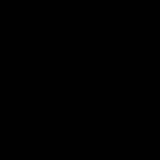

Current loss: 0.27588719721953403


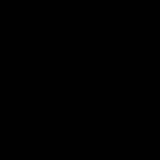

Current loss: 0.2757827168249565


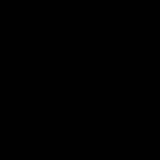

Current loss: 0.27559086934524535


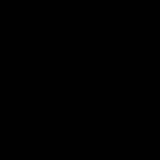

Current loss: 0.2744231493711824


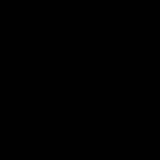

Current loss: 0.27255212100336923


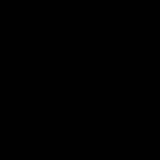

Current loss: 0.2707236114436038


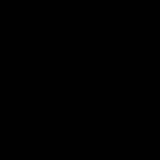

Current loss: 0.2701597314201317


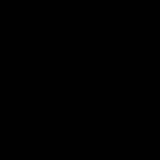

Current loss: 0.2691750631296199


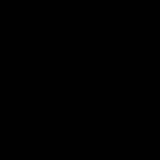

Current loss: 0.2687699808984515


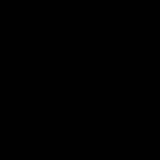

Current loss: 0.26805349674594603


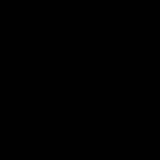

Current loss: 0.26684823004867886


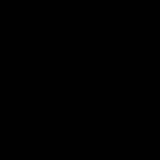

Current loss: 0.26552501809433293


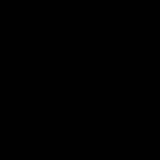

Current loss: 0.26410948079506724


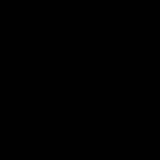

Current loss: 0.2633803771013187


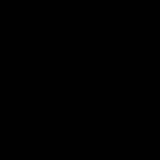

Current loss: 0.26332710805434933


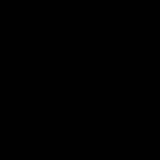

Current loss: 0.263238955218112


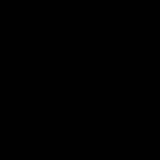

Current loss: 0.2631138848614456


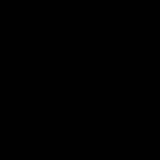

Current loss: 0.26303158233693724


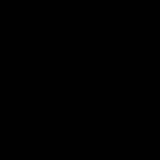

Current loss: 0.26298108220814564


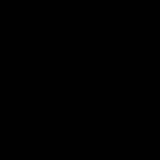

Current loss: 0.26291254259478336


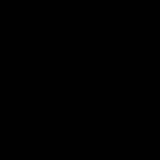

Current loss: 0.2628780954241319


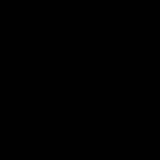

Current loss: 0.2628644091486476


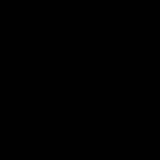

Current loss: 0.2628415653631345


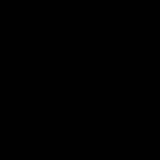

Current loss: 0.2628021046767015


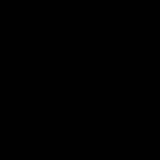

Current loss: 0.26273716334187736


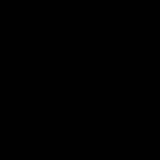

Current loss: 0.26264859581322


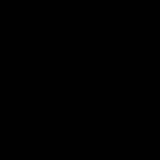

Current loss: 0.26250022450028454


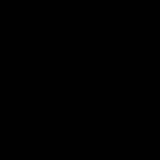

Current loss: 0.2622614325757535


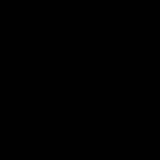

Current loss: 0.26196143268926464


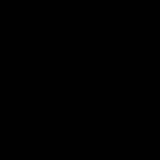

Current loss: 0.2617919794797674


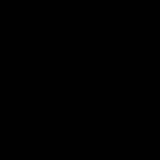

Current loss: 0.26173947455051727


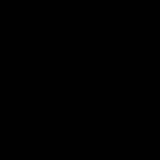

Current loss: 0.26140061896582467


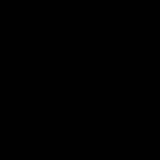

Current loss: 0.2611614574428116


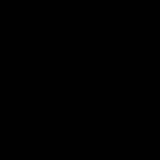

Current loss: 0.26073588612223464


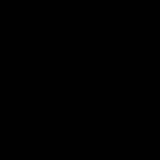

Current loss: 0.26017392637549086


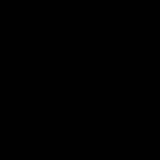

Current loss: 0.25985413772320876


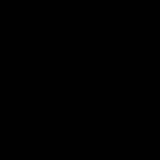

Current loss: 0.25927628475091946


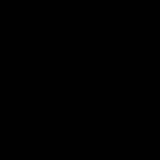

Current loss: 0.258412404612393


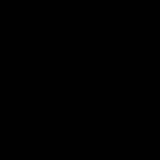

Current loss: 0.2582000134909911


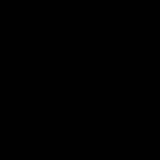

Current loss: 0.2580318198910928


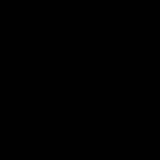

Current loss: 0.25787952828210836


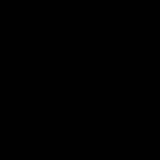

Current loss: 0.2578487813352237


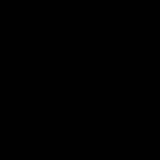

Current loss: 0.2578069646044221


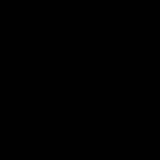

Current loss: 0.2577446584598828


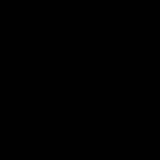

Current loss: 0.2576560533650891


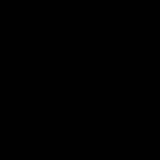

Current loss: 0.2570556578597951


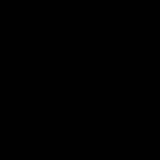

Current loss: 0.25693302272998464


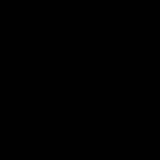

Current loss: 0.256716741280278


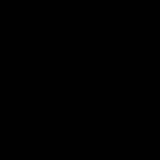

Current loss: 0.25637949326189247


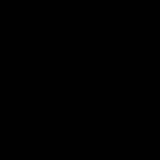

Current loss: 0.25613012649665223


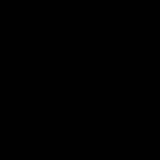

Current loss: 0.25601426509091174


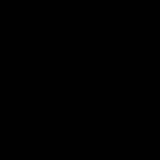

Current loss: 0.2558988749937542


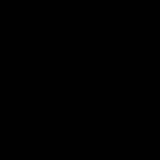

Current loss: 0.2558587761671781


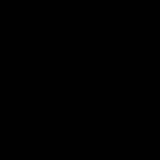

Current loss: 0.2557998955969957


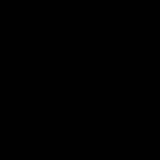

Current loss: 0.2557659963296135


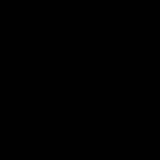

Current loss: 0.2557591737307032


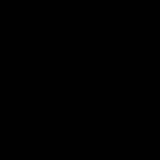

Current loss: 0.2557547629148903


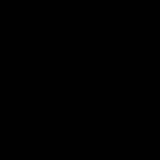

Current loss: 0.25575291341184825


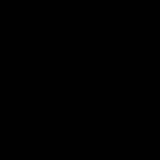

Current loss: 0.2557505898964445


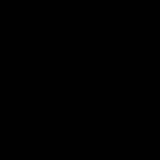

Current loss: 0.2557470392828769


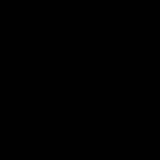

Current loss: 0.2557411040396078


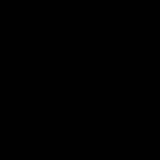

Current loss: 0.25573132653574404


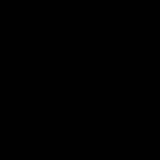

Current loss: 0.25571762168429757


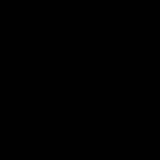

Current loss: 0.2557013132175803


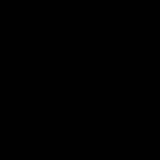

Current loss: 0.25567619027714017


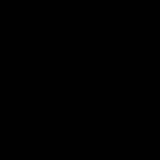

Current loss: 0.25565114613886064


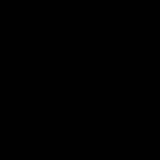

Current loss: 0.2556431946903267


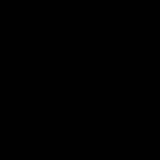

Current loss: 0.2556329313202932


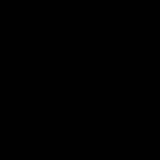

Current loss: 0.2556249555378656


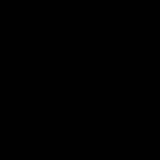

Current loss: 0.25561485459777367


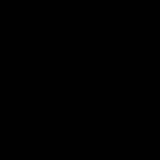

Current loss: 0.2556062426063749


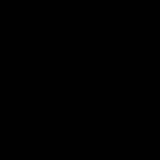

Current loss: 0.25560077008083315


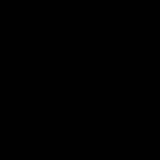

Current loss: 0.25559401776012414


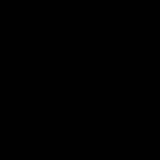

Current loss: 0.2555853432458237


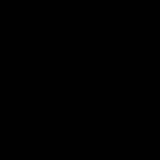

Current loss: 0.25557037996165666


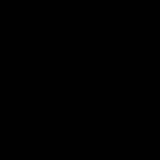

Current loss: 0.2555582547301397


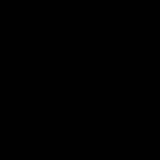

Current loss: 0.2555376397409409


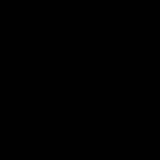

Current loss: 0.2555030811663953


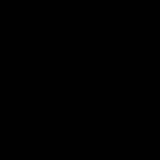

Current loss: 0.25544931616677924


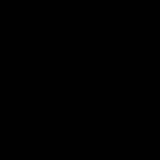

Current loss: 0.2554116497830349


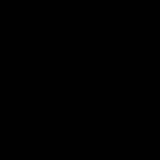

Current loss: 0.2553916881561672


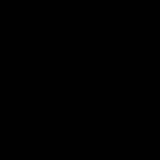

Current loss: 0.25536417345968065


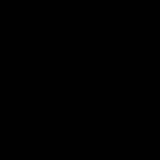

Current loss: 0.2553374622807212


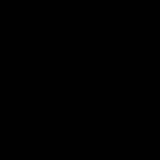

Current loss: 0.255297675079191


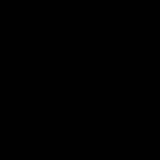

Current loss: 0.25525714342894823


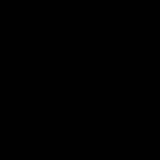

Current loss: 0.2552324423270633


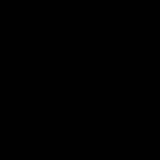

Current loss: 0.25521201236637625


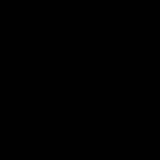

Current loss: 0.25520195402310386


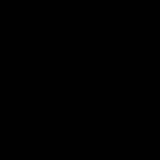

Current loss: 0.25519009098006573


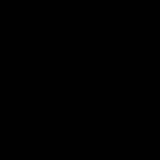

Current loss: 0.25517566809795955


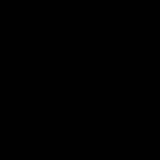

Current loss: 0.25515648786347445


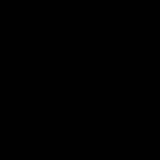

Current loss: 0.255133878918697


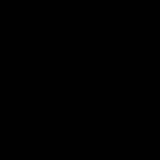

Current loss: 0.25512254125071165


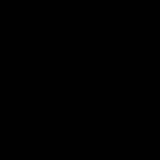

Current loss: 0.255107249463301


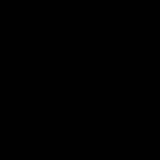

Current loss: 0.2550867580147512


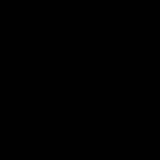

Current loss: 0.25505766731687307


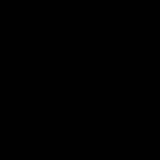

Current loss: 0.25502490361665664


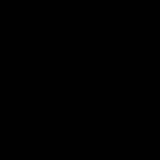

Current loss: 0.25499691005075686


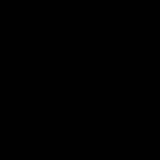

Current loss: 0.2549697969959782


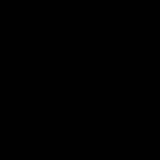

Current loss: 0.254955512579075


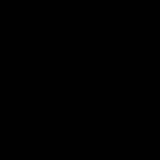

Current loss: 0.25494750535181476


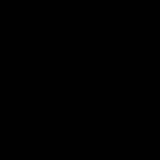

Current loss: 0.2549343982445367


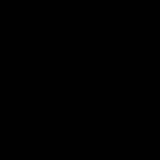

Current loss: 0.2549206425403804


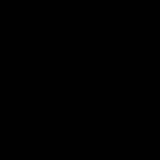

Current loss: 0.2549092462927073


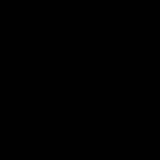

Current loss: 0.25489334228400184


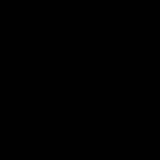

Current loss: 0.25486617814807144


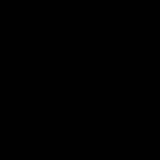

Current loss: 0.25484496921833233


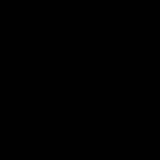

Current loss: 0.2548216212288442


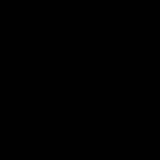

Current loss: 0.25480219762449485


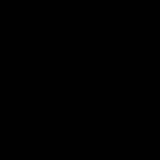

Current loss: 0.2547754773793929


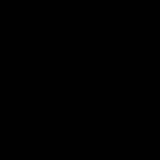

Current loss: 0.25475779878656335


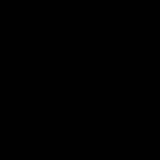

Current loss: 0.25473759906162907


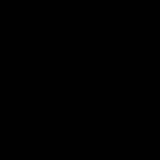

Current loss: 0.2547271894115727


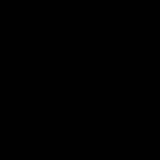

Current loss: 0.2547104887305869


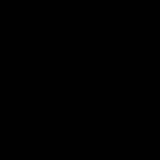

Current loss: 0.25468530213427865


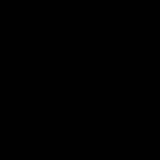

Current loss: 0.25465105390325626


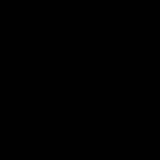

Current loss: 0.25462866777898163


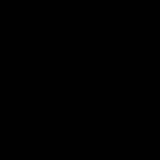

Current loss: 0.25459594353614556


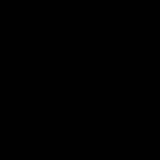

Current loss: 0.25457747606764836


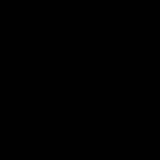

Current loss: 0.2545526993246692


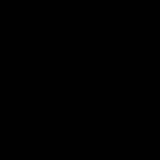

Current loss: 0.25453516563244216


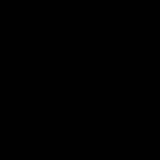

Current loss: 0.254521755752255


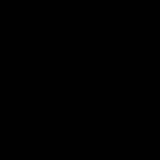

Current loss: 0.25450508364514735


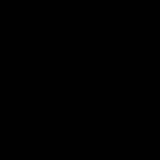

Current loss: 0.2544873475599052


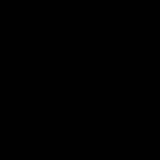

Current loss: 0.25446092096016515


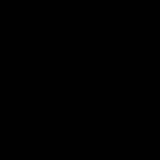

Current loss: 0.2544456547427062


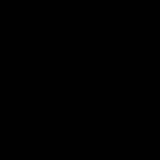

Current loss: 0.2544280272521656


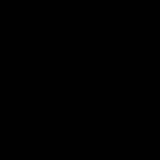

Current loss: 0.2544133955988479


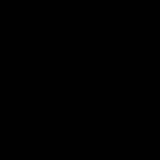

Current loss: 0.2543973371343685


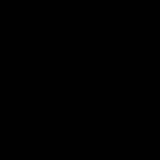

Current loss: 0.254375049809505


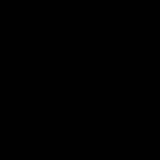

Current loss: 0.2543575147424608


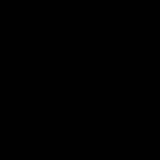

Current loss: 0.25434317099362347


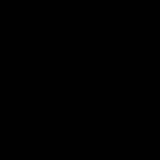

Current loss: 0.25432819205771284


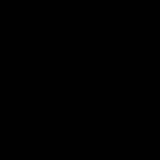

Current loss: 0.25431125736793414


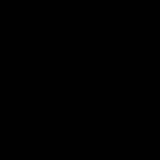

Current loss: 0.25429133833106077


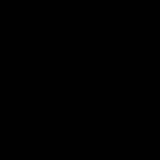

Current loss: 0.25427743647215284


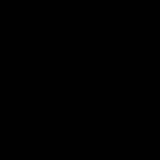

Current loss: 0.254258340723195


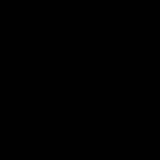

Current loss: 0.25424658195446015


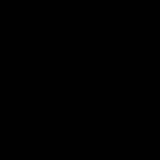

Current loss: 0.25422772728710197


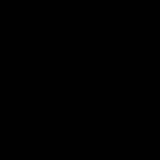

Current loss: 0.2542146970373719


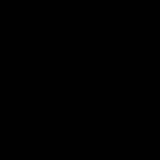

Current loss: 0.2542034183166433


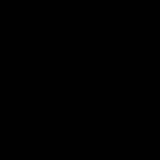

Current loss: 0.2541906719757645


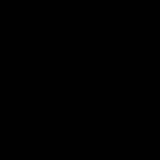

Current loss: 0.25417021015140107


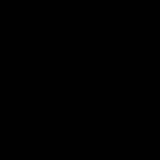

Current loss: 0.2541571095708819


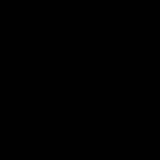

Current loss: 0.25413826355180813


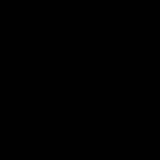

Current loss: 0.254113194398201


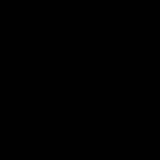

Current loss: 0.2540946117154812


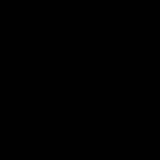

Current loss: 0.25407247436451985


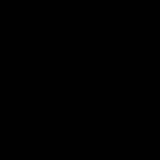

Current loss: 0.25406429683868925


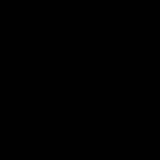

Current loss: 0.25405396051498885


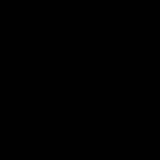

Current loss: 0.2540398712653852


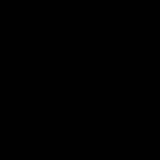

Current loss: 0.25401886165192045


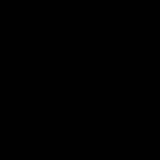

Current loss: 0.25400757803336393


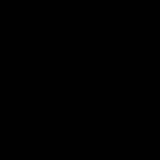

Current loss: 0.2539904712229327


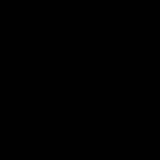

Current loss: 0.2539658890087052


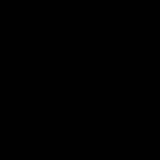

Current loss: 0.25395142413825644


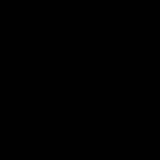

Current loss: 0.25393645909232576


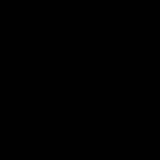

Current loss: 0.25392210083107636


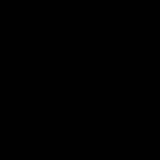

Current loss: 0.2539158493728477


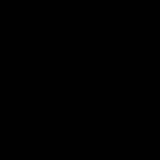

Current loss: 0.25390804490249963


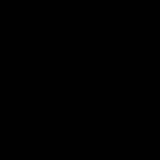

Current loss: 0.2538982053624008


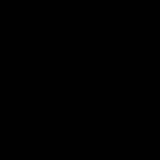

Current loss: 0.25389205253917313


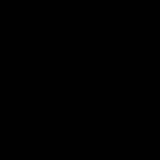

Current loss: 0.25388303644819377


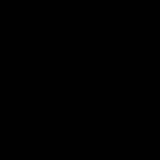

Current loss: 0.25387027731056466


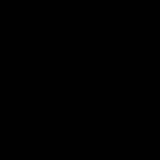

Current loss: 0.2538617125467675


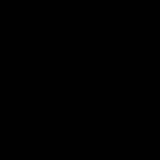

Current loss: 0.2538506513978285


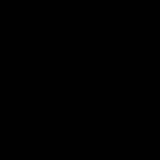

Current loss: 0.2538459847014314


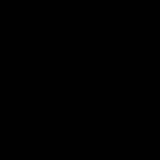

Current loss: 0.25383933451546237


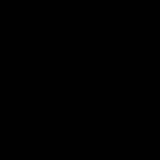

Current loss: 0.2538309706688031


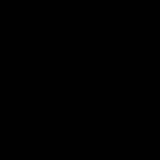

Current loss: 0.2538201405881503


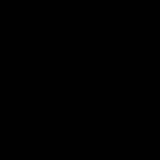

Current loss: 0.2538145288123024


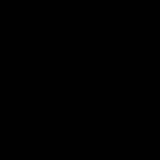

Current loss: 0.2538073629230684


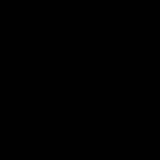

Current loss: 0.2537992619503293


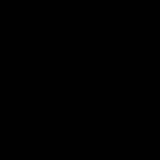

Current loss: 0.2537894764064865


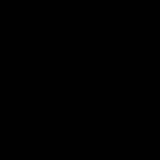

Current loss: 0.2537812957958455


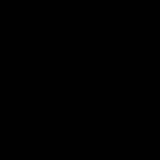

Current loss: 0.25377237014764553


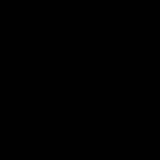

Current loss: 0.2537679196408049


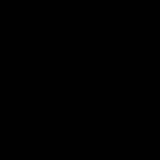

Current loss: 0.25376120968843663


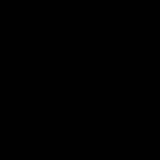

Current loss: 0.2537564857413124


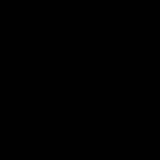

Current loss: 0.25375417024050007


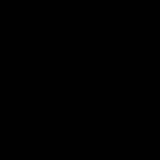

Current loss: 0.2537503979360146


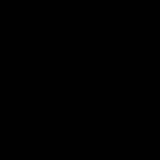

Current loss: 0.2537468686801537


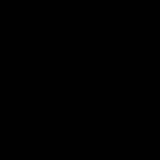

Current loss: 0.25374406220383283


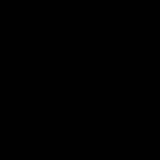

Current loss: 0.25373969209124303


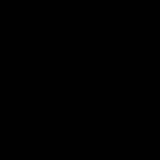

Current loss: 0.253734641411248


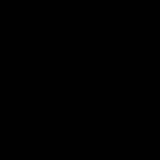

Current loss: 0.25372958401492973


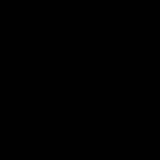

Current loss: 0.2537258011558874


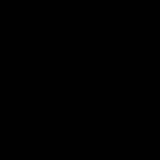

Current loss: 0.2537198352940979


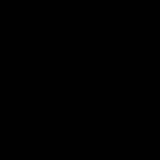

Current loss: 0.2537155168095724


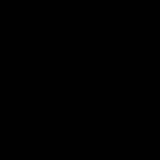

Current loss: 0.25371148592615056


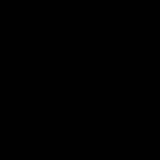

Current loss: 0.253705893449383


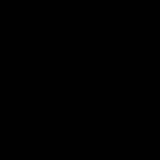

Current loss: 0.2536994355063462


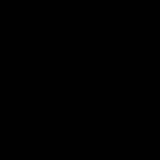

Current loss: 0.25368972784142985


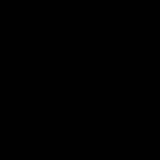

Current loss: 0.2536793460825505


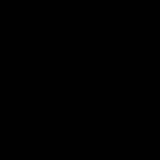

Current loss: 0.2536748825602564


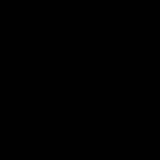

Current loss: 0.25366978612925783


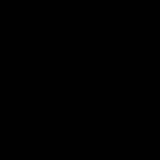

Current loss: 0.25366755098829274


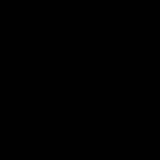

Current loss: 0.25366537413898016


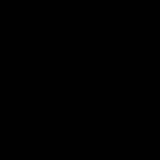

Current loss: 0.25366432696906827


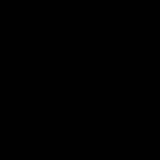

Current loss: 0.25366347276675816


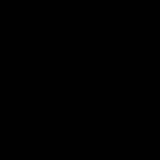

Current loss: 0.2536624140306655


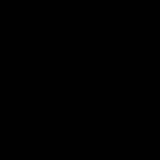

Current loss: 0.2536610943767428


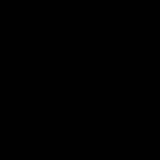

Current loss: 0.25365607495578046


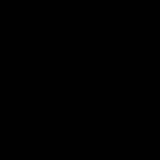

Current loss: 0.2536542291076346


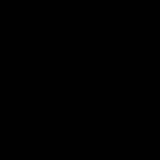

Current loss: 0.25365253145821787


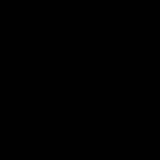

Current loss: 0.25365087954856824


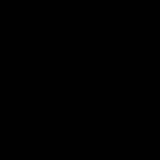

Current loss: 0.25364965921097127


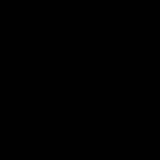

Current loss: 0.2536493208184206


In [14]:
# Define the shape of the parameters
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=2, n_wires=n_qubits)
# shape_p = qml.BasicEntanglerLayers.shape(n_layers=2, n_wires=n_qubits)

# Define the objective function (to be minimized)
def objective(params):
    # print(params)
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    # print('Param')
    # print(weights_p1_flat)
    # weights_p2_flat = params[original_length : 2*original_length]
    # weights_p3_flat = params[2*original_length : 3*original_length]
    # weights_p4_flat = params[3*original_length : 4*original_length]

    # Reshape each segment
    weights_p1 = weights_p1_flat.reshape(shape_p)
    # print(weights_p1)
    # weights_p2 = weights_p2_flat.reshape(shape_p)
    # weights_p3 = weights_p3_flat.reshape(shape_p)
    # weights_p4 = weights_p4_flat.reshape(shape_p)
    # print('===================')
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    # raise Exception
    # print('==============')
    # print(image_arr)
    # Display the image
    # binary_array_to_png_and_display(image_arr,scale_factor=20)
    # print(prob_image_arr(image_arr,api_key))
    # image_arr = convert_to_int(image_arr)
    # generated_img_feature_map = feature_map(convert_to_int(image_arr))
    generated_img_feature_map = feature_map(image_arr)
    score = cosine_similarity(smiley_pattern_vec,generated_img_feature_map)
    # print(1-score)
    # raise Exception

    
    # print("Largest elements:", largest_elements)
    # print("Indices:", indices)
    # print("Indices in binary:", binary_indices)

    return 1-score

def callback(params):
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    weights_p1 = weights_p1_flat.reshape(shape_p)
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    binary_array_to_png_and_display(image_arr,scale_factor=20)
    print("Current loss:", objective(params))
    
# Initialize the weights
weights_p1 = np.random.random(size=shape_p)
# weights_p2 = np.random.random(size=shape_p)
# weights_p3 = np.random.random(size=shape_p)
# weights_p4 = np.random.random(size=shape_p)

# Flatten and concatenate the initial parameters
init_params = np.concatenate([weights_p1.flatten()])
print(qml.draw(circuit)(weights_p1,1))

# Optimize using BFGS algorithm
opt = minimize(objective, init_params, method='BFGS',callback=callback)


In [15]:
print("Optimized Parameters:", opt.x)
print("Optimized Expectation Value:", opt.fun)

original_length = np.prod(shape_p)
params = opt.x
# Extract segments for each set of weights
weights_p1_flat = params[0 : original_length]
# weights_p2_flat = params[original_length : 2*original_length]
# weights_p3_flat = params[2*original_length : 3*original_length]
# weights_p4_flat = params[3*original_length : 4*original_length]

# Reshape each segment
weights_p1 = weights_p1_flat.reshape(shape_p)
# weights_p2 = weights_p2_flat.reshape(shape_p)
# weights_p3 = weights_p3_flat.reshape(shape_p)
# weights_p4 = weights_p4_flat.reshape(shape_p)
# print(circuit_res(weights_p1,weights_p2,weights_p3,weights_p4)

Optimized Parameters: [ 9.49514961e-01 -1.10964418e+00  2.10912063e-01  8.92693218e-01
 -7.63183226e-02  2.92901614e+00  6.29116530e-01  1.20534383e-03
  1.51123648e+00  9.98480819e-01  1.53417404e+00 -1.06479282e+00
  9.76360870e-01  5.00128393e-02  5.72462210e-01  4.80599674e-01
 -1.53764181e+00  1.39654562e+00  5.90751008e-01  1.04084364e+00
 -2.48225564e-04  5.69888116e-02 -1.95078999e-02  6.84637687e-01
 -1.18815684e-01 -3.91287208e-02  6.99091322e-01  8.30585660e-01
  1.56919921e+00  8.11240305e-01  8.84804596e-01  1.46001242e+00
  3.55317495e-01  1.22816876e+00  6.31254025e-01  5.09813217e-01
  7.21342076e-01  8.72873228e-01  7.72097736e-01 -2.63388396e-01
  1.02403111e-01  7.79155645e-01  1.38552772e+00  1.55461154e+00
  9.15561244e-01  1.11037538e-01  3.64731554e-01  8.56956990e-02]
Optimized Expectation Value: 0.2536493208184206


In [16]:
res = circuit(weights_p1,0)
# print(res)

In [17]:

# Example array
arr = res
n = 3

# Find n largest numbers and their indices
largest_elements, indices = find_n_largest_numbers(arr, n)

# Convert indices to binary
binary_indices = indices_to_binary(indices)

print("Largest elements:", largest_elements)
print("Indices:", indices)
print("Indices in binary:", binary_indices)


TypeError: only integer scalar arrays can be converted to a scalar index